<a href="https://colab.research.google.com/github/Dhivyaindhu/customer-Segmentation/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
data=pd.read_csv("/content/ecom cust seg.csv")
data.columns

Index(['Cust_ID', 'Gender', 'Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus',
       'Udis', 'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks',
       'H&M', 'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics',
       'Siemens', 'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq',
       'IBM', 'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger',
       'Hollister', 'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix',
       'Kraft'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
data.shape
data.describe()
data.isnull().sum()


,0
Cust_ID,0
Gender,2724
Orders,0
Jordan,0
Gatorade,0
Samsung,0
Asus,0
Udis,0
Mondelez International,0
Wrangler,0


In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load your data
data = pd.read_csv("/content/ecom cust seg.csv")

# Identify non-numerical columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Convert non-numerical columns to numerical using one-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_cols)

# Scale the data using StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded)

# Apply KMeans clustering
KMeans = KMeans(n_clusters=3)
KMeans.fit(data_scaled)

KMeans(n_clusters=3)

In [ ]:
categorical_cols = data.select_dtypes(include=['object']).columns
data_encoded = pd.get_dummies(data, columns=categorical_cols)

# Scale numerical features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded)

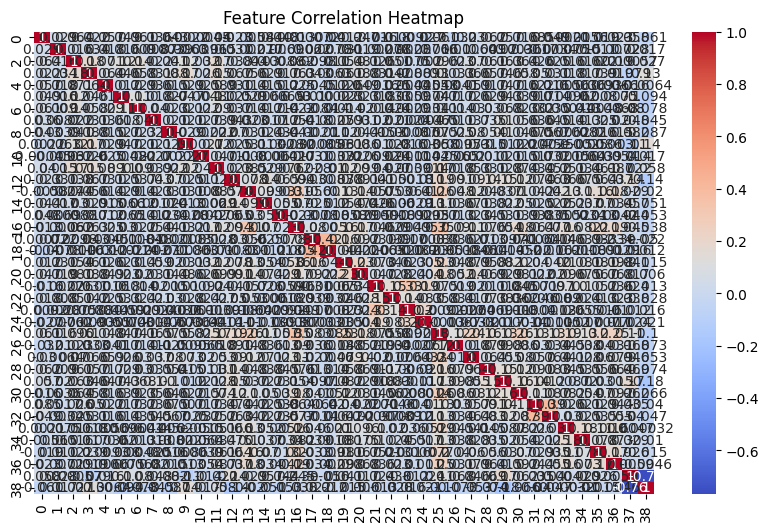

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pd.DataFrame(data_scaled).corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


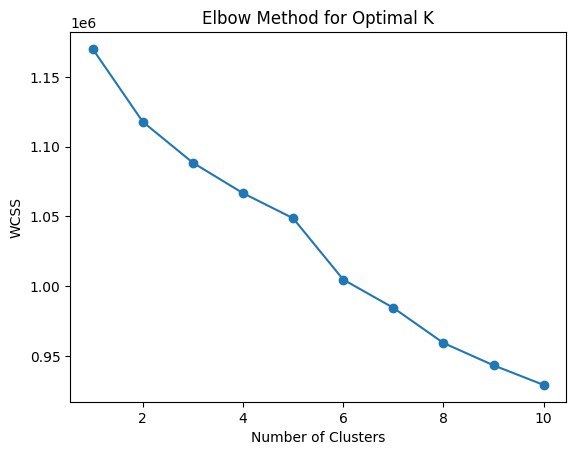

In [ ]:
from sklearn.cluster import KMeans

wcss = []  # Within-Cluster Sum of Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()


In [ ]:
# Choose optimal clusters (based on Elbow Method)
optimal_clusters = 3

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

# View cluster assignments
print(data[['Cluster']].head())


   Cluster
0        0
1        1
2        0
3        0
4        2


In [ ]:
from sklearn.metrics import silhouette_score

score = silhouette_score(data_scaled, data['Cluster'])
print(f"Silhouette Score: {score:.2f}")


Silhouette Score: 0.17


In [ ]:
# Analyze cluster-wise averages for numeric columns only
cluster_summary = data.groupby('Cluster').mean(numeric_only=True)
print(cluster_summary)

              Cust_ID    Orders    Jordan  Gatorade   Samsung      Asus  \
Cluster                                                                   
0        14018.956562  4.012464  0.155382  0.177967  0.137482  0.061103   
1        17610.220885  4.627215  0.521169  0.402002  0.432436  0.426079   
2        16306.544234  4.150869  0.674566  0.631912  0.439968  0.304897   

             Udis  Mondelez International  Wrangler      Vans  ...        LG  \
Cluster                                                        ...             
0        0.056839                0.079893  0.034675  0.094419  ...  0.055011   
1        0.379278                0.288787  0.286893  0.118896  ...  0.120925   
2        0.228278                0.278831  0.274092  0.354660  ...  0.796209   

             Dior    Scabal  Tommy Hilfiger  Hollister  Forever 21  Colavita  \
Cluster                                                                        
0        0.132327  0.146291        0.071412   0.020008    0.015

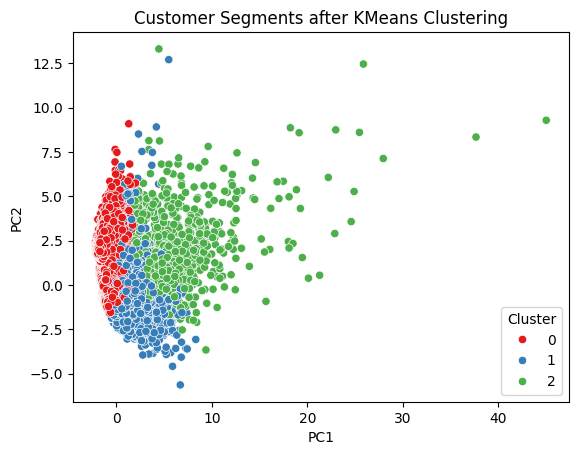

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

df_pca = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = data['Cluster']

# Scatter plot of clusters
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='Set1', data=df_pca)
plt.title("Customer Segments after KMeans Clustering")
plt.show()
